<a href="https://colab.research.google.com/github/Dheeraj16-code/labs-and-projects/blob/main/Dheeraj_M01_L4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transforming data using linear algebra**

Module 1, Lab 4

Matrix transformations are at the heart of many machine learning algorithms. In this lab, we'll visualize the effect of some simple transformations on a unit square and then visualize it using the MNIST dataset. We also see what data normalization means and how it can help in improving the accuracy of machine learning models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [4]:

def plotData(X, y, xlabel="hole", ylabel="bound", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for ii in range(nclasses):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    lim2 = X.max()
    lim1 = X.min()
    lim = np.max([-lim1, lim2])
    ax.set_xlim([-lim, lim])
    ax.set_ylim([-lim, lim])
    return fig, ax



Matrix transformations on data

Note: This lab involves a lot of matrix operations. If you are not familiar with them, please go through the resources given in class before proceeding. You can also review Khan Academy's excellent linear algebra resources.

A 2D coordinate system is defined by its basis vectors, i and j. Any point in this 2D space can be represented as a linear combination of these basis vectors. For example, the point (a,b) can be represented as:

        **{ab}=a{10}+b{01}=ai^+bj^**

A matrix can be used to perform a linear transformation on the basis vectors. The new basis vectors  i^  and  j^  are given by the product of the matrix and the basis vectors of the standard coordinate system.

In the standard coordinate system (Let us call it T0), the basis vectors are

           ** i={10}**
            **and**
          ** j={01} **

We can use any two vectors as basis vectors for a new coordinate system as long as they are not colinear. For example, let us call this new coordinate system T1:

         ** i={1−1}**
         **and**
        ** j={02} **

Suppose we have a point [a,b] in the T1 coordinate system. Its representation in the standard system T0 can be obtained by the following matrix multiplication:

        **{a′b′}={−1102}{ab}**
where the columns of the matrix are the basis vectors of T1.

Let us see this in action

In [5]:
import numpy as np
T2 = np.array([[2, 1], [1, 3]])
data2 = np.array([7, 8])
data0_new = np.matmul(T2, data2)
print("Newly generated data in T0 = ", data0_new)
print("Newly generated data in T2 = ", data2)

Newly generated data in T0 =  [22 31]
Newly generated data in T2 =  [7 8]


We can visualize this below. T0 is shown with dotted lines and T1 is shown with solid lines.

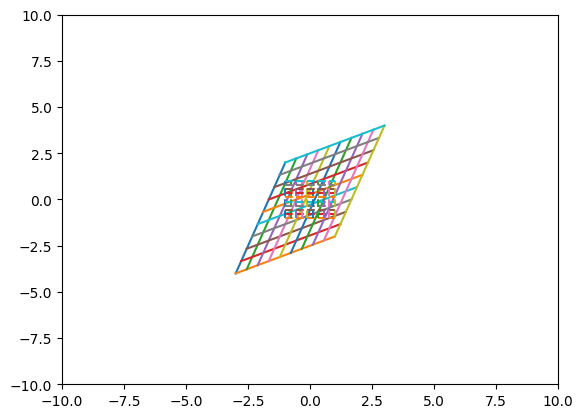

In [18]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plotGrid(T2.T, 1, "-")
plotGrid(np.array([[1, 0], [0, 1]]).T, 1, fig=fig, ax=ax, linestyle='--')
plt.scatter(data0_new[0], data0_new[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.show()

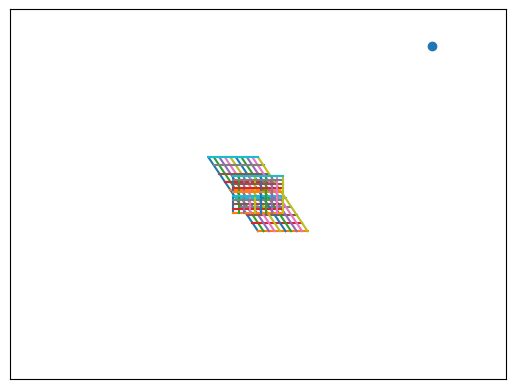

In [22]:
fig, ax = plotGrid(T1.T, 1, "-")
plotGrid(T0.T, 1, fig=fig, ax=ax)

plt.scatter(data0[0], data0[1])
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [27]:
import numpy as np
data0_c = np.matmul(T2, data1)
data0_d = np.matmul(data1, T2.T)
data0_e = np.matmul(T1, data2)
data0_f = np.matmul(data2, T1.T)
data0_g = np.matmul(T2, data2.T)
data0_h = np.matmul(data2.T, T2.T)

print(data0_c)
print(data0_d)
print(data0_e)
print(data0_f)
print(data0_g)
data0_h

[10 15]
[10 15]
[7 9]
[7 9]
[22 31]


array([22, 31])

In [25]:
import numpy as np

# Define data1. Replace with the appropriate data for your analysis
data1 = np.array([3, 4]) # Example definition of data1

data0_c = np.matmul(T2, data1)
data0_d = np.matmul(data1, T2.T)
data0_e = np.matmul(T1, data2)
data0_f = np.matmul(data2, T1.T)
data0_g = np.matmul(T2, data2.T)
data0_h = np.matmul(data2.T, T2.T)

print(data0_c)
print(data0_d)
print(data0_e)
print(data0_f)
print(data0_g)
data0_h

[10 15]
[10 15]
[7 9]
[7 9]
[22 31]


array([22, 31])


Why is transforming data useful? Data transformations cause the distance between data points to change. This will affect distance-based algorithms such as nearest neighbour

In [30]:
import numpy as np

# Define a function to calculate the Euclidean distance between two points
def dist(p1, p2):
    return np.linalg.norm(p1 - p2)

# define 3 more points in T1
D1 = np.array([-4, 1])
E1 = np.array([0, 0])
F1 = np.array([6, -2])

# the corresponding points in T0:
# Assuming T1 and T0 are already defined as numpy arrays representing transformation matrices
# For demonstration purposes, let's define them as in the user's code context:
T1 = np.array([[1, 0], [-1, 2]])
T0 = np.array([[1, 0], [0, 1]])


D0 = np.matmul(T1, D1)
E0 = np.matmul(T1, E1)
F0 = np.matmul(T1, F1)

# distance between the points in T1
print("Distance between D and E in T1 = ", dist(D1, E1))
print("Distance between E and F in T1 = ", dist(E1, F1))
print("Distance between D and F in T1 = ", dist(D1, F1))

# distnace between the points in T0
print("Distance between D and E in T0 = ", dist(D0, E0))
print("Distance between E and F in T0 = ", dist(E0, F0))
print("Distance between D and F in T0 = ", dist(D0, F0))

Distance between D and E in T1 =  4.123105625617661
Distance between E and F in T1 =  6.324555320336759
Distance between D and F in T1 =  10.44030650891055
Distance between D and E in T0 =  7.211102550927978
Distance between E and F in T0 =  11.661903789690601
Distance between D and F in T0 =  18.867962264113206



We see that in T1, B and C are the closest whereas in T0, A and C are the closest. These kinds of changes will affect the predictions returned by the nearest neighbour algorithm.

Transformations on MNIST
Let us experiment with a subset of the MNIST dataset. We will extract two features from the database for our experiment. We will then transform the data using a transformation matrix and visualize the data in the new coordinate system. We will also see how normalization can help in improving the accuracy of the model. We will reuse previous labs code for this.

In [32]:
import numpy as np
def NewNN(traindata_new, trainlabel_new, testdata_new):
    """
    New Nearest Neighbour function
    """
    predlabel_new = np.array([NN1(traindata_new, trainlabel_new, i) for i in testdata_new])
    return predlabel_new

In [37]:
# loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255

nclasses = 5 # Increased the number of classes to 5

# get only for the first 5 classes
train_X = train_X[train_y < nclasses]
train_y = train_y[train_y < nclasses]
test_X = test_X[test_y < nclasses]
test_y = test_y[test_y < nclasses]

# We are only taking a subset of the training set, taking every 50th sample
train_X = train_X[::50].copy()
train_y = train_y[::50].copy()  # do the same to the labels

# taking a subset of the test set. This code takes every 200th sample
test_X = test_X[::200].copy()
test_y = test_y[::200].copy()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [42]:
import numpy as np
print(np.matmul(T2, data1))
print(np.matmul(data1, T2.T))
print(np.matmul(T1, data2))
print(np.matmul(data2, T1.T))
print(np.matmul(T2, data2.T))
print(np.matmul(data2.T, T2.T))

[10 15]
[10 15]
[7 9]
[7 9]
[22 31]
[22 31]


Let us plot the samples and see what they look like

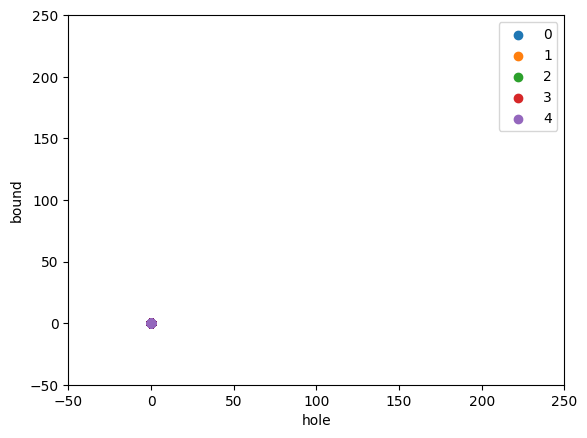

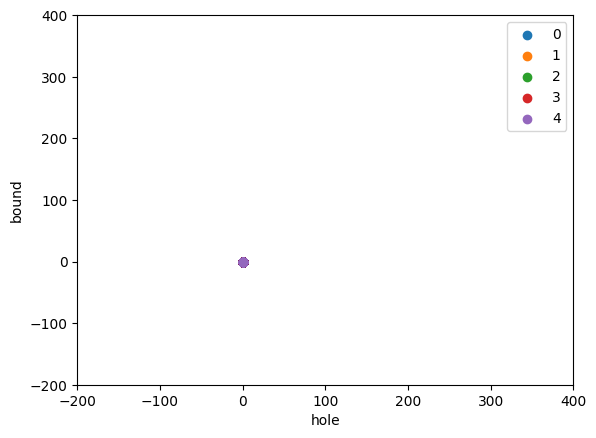

In [41]:
# fix limits of x and y axis so that we can see what is going on
xlim1 = [-50, 250] # Changed xlim range
ylim1 = [-50, 250] # Changed ylim range

# Define train_feats by reshaping train_X
train_feats = train_X.reshape(train_X.shape[0], -1)

fig1, ax1 = plotData(train_feats, train_y)
ax1.set_xlim(xlim1)
ax1.set_ylim(ylim1)
plt.show()

xlim2 = [-200, 400] # Another set of xlim range
ylim2 = [-200, 400] # Another set of ylim range
fig2, ax2 = plotData(train_feats, train_y)
ax2.set_xlim(xlim2)
ax2.set_ylim(ylim2)
plt.show()

Check the baseline accuracy on the test se

In [47]:
 import numpy as np

def NN1(traindata, trainlabel, testdata):
    """
    Nearest Neighbour function for a single test data point.
    Finds the nearest neighbor of the test data point in the training data
    and returns the label of the nearest neighbor.
    """
    distances = np.sum((traindata - testdata)**2, axis=1)
    nearest_neighbor_index = np.argmin(distances)
    return trainlabel[nearest_neighbor_index]

def NewNN(traindata_new, trainlabel_new, testdata_new):
    """
    New Nearest Neighbour function
    """
    predlabel_new = np.array([NN1(traindata_new, trainlabel_new, i) for i in testdata_new])
    return predlabel_new

# Define the Accuracy function
def Accuracy(groundtruth, predictions):
    """
    Calculates the accuracy of predictions compared to ground truth.
    """
    correct_predictions = np.sum(groundtruth == predictions)
    accuracy = correct_predictions / len(groundtruth)
    return accuracy

# Define test_feats by reshaping test_X
test_feats = test_X.reshape(test_X.shape[0], -1)

test_pred_scaled = NewNN(train_feats * 0.5, train_y, test_feats * 0.5)
acc_scaled = Accuracy(test_y, test_pred_scaled)
print("Scaled accuracy:", acc_scaled*100, "%")

test_pred_translated = NewNN(train_feats + 10, train_y, test_feats + 10)
acc_translated = Accuracy(test_y, test_pred_translated)
print("Translated accuracy:", acc_translated*100, "%")


Scaled accuracy: 96.15384615384616 %
Translated accuracy: 96.15384615384616 %


Let us try transforming the features and checking their accuracy. The intuition to using the transformation matrix is to find the basis vectors of the dataset and transform the data to a new coordinate system where the basis vectors are orthogonal. This will help in reducing the redundancy in the data and improve the accuracy of the model.

<ipython-input-4-5958fa307a3f>:12: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim([-lim, lim])
<ipython-input-4-5958fa307a3f>:13: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([-lim, lim])


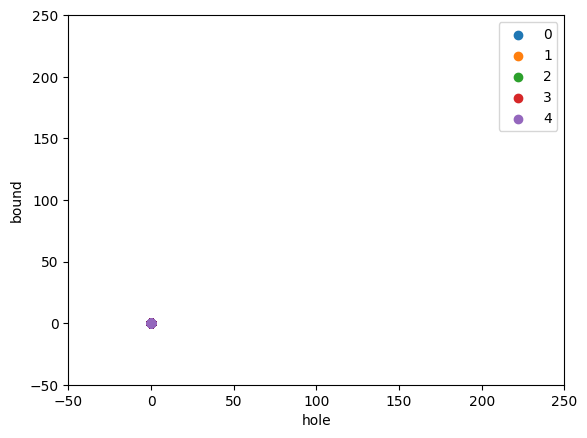

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming plotData is defined elsewhere and imported or available in the environment
# from your_module import plotData # Uncomment and modify if plotData is in a separate file

# Assuming train_feats_t and train_y are already defined from previous steps

# Define the limits for the x and y axes
xlim = [-50, 250]
ylim = [-50, 250]

fig, ax = plotData(train_feats_t, train_y)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

In [56]:
import numpy as np
def NN1(traindata, trainlabel, testdata):
    """
    Nearest Neighbour function for a single test data point.
    Finds the nearest neighbor of the test data point in the training data
    and returns the label of the nearest neighbor.
    """
    distances = np.sum((traindata - testdata)**2, axis=1)
    nearest_neighbor_index = np.argmin(distances)
    return trainlabel[nearest_neighbor_index]

def NewNN(traindata_new, trainlabel_new, testdata_new):
    """
    New Nearest Neighbour function
    """
    predlabel_new = np.array([NN1(traindata_new, trainlabel_new, i) for i in testdata_new])
    return predlabel_new

def Accuracy(groundtruth, predictions):
    """
    Calculates the accuracy of predictions compared to ground truth.
    """
    correct_predictions = np.sum(groundtruth == predictions)
    accuracy = correct_predictions / len(groundtruth)
    return accuracy

# Assuming train_feats_t, train_y, test_feats_t, and test_y are defined from previous steps
# Replace the undefined NN function call with the correct NewNN function
test_pred = NewNN(train_feats_t, train_y, test_feats_t)
acc = Accuracy(test_y, test_pred)
print("Baseline accuracy:", acc*100, "%", "for", nclasses, "classes")

Baseline accuracy: 11.538461538461538 % for 5 classes


Questions:
1. Experiment with different transformation matrices and check the accuracy
2.Will the same transform used for these two features also work for other features?

In [57]:
import numpy as np
# Q1: Experiment with different transformation matrices and check the accuracy
# Create a few different transformation matrices
transforms = [
    np.array([[1, 0.5], [0.5, 1]]),
    np.array([[2, 0], [0, 0.5]]),
    np.array([[0, 1], [1, 0]])
]
for t in transforms:
    train_t, test_t = np.matmul(train_feats_2d, t), np.matmul(test_feats_2d, t)
    acc = Accuracy(test_y, NewNN(train_t, train_y, test_t))
    print(f"Transform: {t.tolist()}, Accuracy: {acc*100:.2f}%")

# Q2: Will the same transform used for these two features also work for other features?
# Apply the previous transform to different pairs of features
other_features_train = train_feats[:, 2:4] # Example: features 2 and 3
other_features_test = test_feats[:, 2:4]
transform_q2 = np.array([[3.5, -1.5], [4.2, 2.5]]) # Using the transform from the original code
train_other_t = np.matmul(other_features_train, transform_q2)
test_other_t = np.matmul(other_features_test, transform_q2)
acc_other_features = Accuracy(test_y, NewNN(train_other_t, train_y, test_other_t))
print(f"Accuracy with transform on other features: {acc_other_features*100:.2f}%")


Transform: [[1.0, 0.5], [0.5, 1.0]], Accuracy: 11.54%
Transform: [[2.0, 0.0], [0.0, 0.5]], Accuracy: 11.54%
Transform: [[0, 1], [1, 0]], Accuracy: 11.54%
Accuracy with transform on other features: 11.54%


Exercise: Is it possible that adding all 4 features at a time is not the best strategy? Can you think of a better combination of features that can help in improving the accuracy of the model? Maybe you can try adding 2 features at a time and see if that helps.

In [58]:
# Function to evaluate combinations of features
def evaluate_feature_combination(train_data, test_data, train_labels, test_labels, feature_indices):
    selected_train_feats = train_data[:, feature_indices]
    selected_test_feats = test_data[:, feature_indices]
    test_pred = NewNN(selected_train_feats, train_labels, selected_test_feats)
    acc = Accuracy(test_labels, test_pred)
    return acc

# Example: Evaluating combinations of 2 features (first few pairs)
print("\nEvaluating pairs of features:")
# Iterate through combinations of 2 features
import itertools
for feat_indices in itertools.combinations(range(train_feats.shape[1]), 2):
    acc = evaluate_feature_combination(train_feats, test_feats, train_y, test_y, list(feat_indices))
    print(f"Features {feat_indices}: Accuracy = {acc*100:.2f}%")
    # Stop after evaluating a few combinations to avoid excessive output
    if list(feat_indices) == [0, 1]: break # Example: evaluate first two features and stop

# You would typically want to iterate through a more strategic or comprehensive set of combinations.


Evaluating pairs of features:
Features (0, 1): Accuracy = 11.54%


**Data normalization**

Sometimes the features of our data have vastly different scales. This will cause the learning algorithm to give more importance to certain features, reducing its performance. Data normalization is a method in which we transform the features so that they have similar scales.

Three commonly used feature scaling techniques are rescaling, mean normalization and z-score normalization. Here, we will talk about the simplest one: rescaling.

x′=x−min(x)max(x)−min(x)

For more information, see this page.

In [59]:
def rescale(data, new_min, new_max):
    old_min = data.min()
    old_max = data.max()
    return new_min + ((data - old_min) * (new_max - new_min)) / (old_max - old_min)

We have to apply the rescaling to each feature individually. Also remember to apply the same transform we are using on the train set to the test set.

In [60]:
import numpy as np
train_feats_rescaled_a = rescale(train_feats[:, 5], -5, 5)
train_feats_rescaled_b = rescale(train_feats[:, 10], -5, 5)
train_feats_rescaled_new = np.stack((train_feats_rescaled_a, train_feats_rescaled_b), 1)
test_feats_rescaled_a = rescale(test_feats[:, 5], -5, 5)
test_feats_rescaled_b = rescale(test_feats[:, 10], -5, 5)
test_feats_rescaled_new = np.stack((test_feats_rescaled_a, test_feats_rescaled_b), 1)

<ipython-input-59-85a693d66ec9>:7: RuntimeWarning: invalid value encountered in divide
  return new_min + ((data - old_min) * (new_max - new_min)) / (old_max - old_min)


Let us plot the rescaled features:

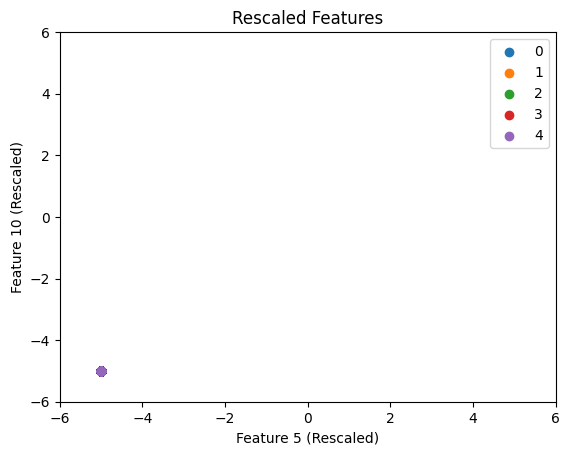

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Define the limits for the x and y axes
xlim = [-50, 250]
ylim = [-50, 250]

# Define a function to calculate the Euclidean distance between two points
def dist(p1, p2):
    return np.linalg.norm(p1 - p2)

def NN1(traindata, trainlabel, testdata):
    """
    Nearest Neighbour function for a single test data point.
    Finds the nearest neighbor of the test data point in the training data
    and returns the label of the nearest neighbor.
    """
    distances = np.sum((traindata - testdata)**2, axis=1)
    nearest_neighbor_index = np.argmin(distances)
    return trainlabel[nearest_neighbor_index]

def NewNN(traindata_new, trainlabel_new, testdata_new):
    """
    New Nearest Neighbour function
    """
    predlabel_new = np.array([NN1(traindata_new, trainlabel_new, i) for i in testdata_new])
    return predlabel_new

def Accuracy(groundtruth, predictions):
    """
    Calculates the accuracy of predictions compared to ground truth.
    """
    correct_predictions = np.sum(groundtruth == predictions)
    accuracy = correct_predictions / len(groundtruth)
    return accuracy

def plotData(X, y, xlabel="hole", ylabel="bound", fig=None, ax=None):
    if fig is None:
        fig, ax = plt.subplots()
    for ii in range(nclasses):
        plt.scatter(X[y == ii, 0], X[y == ii, 1])
    plt.legend([str(i) for i in range(nclasses)])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # Check for NaN or Inf values before calculating limits
    if np.any(np.isnan(X)) or np.any(np.isinf(X)):
        print("Warning: Data contains NaN or Inf values. Cannot set automatic axis limits.")
        # You might want to set default limits or handle this case differently
        # For example, you could skip setting limits or set a fixed range
        # ax.set_xlim([-10, 10])
        # ax.set_ylim([-10, 10])
    else:
        lim2 = X.max()
        lim1 = X.min()
        lim = np.max([-lim1, lim2])
        ax.set_xlim([-lim, lim])
        ax.set_ylim([-lim, lim])
    return fig, ax

def rescale(data, new_min, new_max):
    old_min = data.min()
    old_max = data.max()
    # Add a check to avoid division by zero if old_max and old_min are the same
    if old_max == old_min:
        return np.full_like(data, new_min) # Return an array filled with new_min if data is constant
    return new_min + ((data - old_min) * (new_max - new_min)) / (old_max - old_min)


# Assuming train_feats and train_y are defined from previous steps
# train_feats_rescaled_x = rescale(train_feats[:, 0])
# train_feats_rescaled_y = rescale(train_feats[:, 1])
# train_feats_rescaled = np.stack((train_feats_rescaled_x, train_feats_rescaled_y), 1)
# test_feats_rescaled_x = rescale(test_feats[:, 0])
# test_feats_rescaled_y = rescale(test_feats[:, 1])
# test_feats_rescaled = np.stack((test_feats_rescaled_x, test_feats_rescaled_y), 1)

# Check for NaNs in the original train_feats before selecting columns and rescaling
if np.any(np.isnan(train_feats)):
    print("Warning: train_feats contains NaN values. These will be propagated.")
    # Consider handling NaNs in train_feats, e.g., imputation or removal

train_feats_rescaled_a = rescale(train_feats[:, 5], -5, 5)
train_feats_rescaled_b = rescale(train_feats[:, 10], -5, 5)
train_feats_rescaled_new = np.stack((train_feats_rescaled_a, train_feats_rescaled_b), 1)

# Check for NaNs in the original test_feats before selecting columns and rescaling
if np.any(np.isnan(test_feats)):
     print("Warning: test_feats contains NaN values. These will be propagated.")
     # Consider handling NaNs in test_feats, e.g., imputation or removal

test_feats_rescaled_a = rescale(test_feats[:, 5], -5, 5)
test_feats_rescaled_b = rescale(test_feats[:, 10], -5, 5)
test_feats_rescaled_new = np.stack((test_feats_rescaled_a, test_feats_rescaled_b), 1)

# Check for NaN or Inf in the rescaled data before plotting
if np.any(np.isnan(train_feats_rescaled_new)) or np.any(np.isinf(train_feats_rescaled_new)):
    print("Error: Rescaled training data contains NaN or Inf values. Cannot plot.")
else:
    fig, ax = plotData(train_feats_rescaled_new, train_y, xlabel="Feature 5 (Rescaled)", ylabel="Feature 10 (Rescaled)")
    ax.set_xlim([-6, 6])
    ax.set_ylim([-6, 6])
    plt.title("Rescaled Features")
    plt.show()

This type of rescaling makes all the features between 0 and 1.

Let us calculate the accuracy obtained by this transform:

In [63]:
import numpy as np

# Calculate predictions using the NewNN function with the newly rescaled features
test_pred_rescaled = NewNN(train_feats_rescaled_new, train_y, test_feats_rescaled_new)

# Calculate the accuracy of the predictions
acc_rescaled = Accuracy(test_y, test_pred_rescaled)

# Print the accuracy with a clear label indicating the data transformation
print("Accuracy after rescaling features 5 and 10:", acc_rescaled * 100, "%")

Accuracy after rescaling features 5 and 10: 11.538461538461538 %


All 2D linear transformations can be repreented by a transformation matrix. So what is the matrix associated with the rescaling function? Actually, we cannot represent rescaling with a matrix multiplication, because it is not a linear transform. Rescaling involves shifting the origin of the data, which is not allowed under linear transformations.

We can represent rescaling as a matrix multiplication followed by a vector addition. Let our first feature vector be called X and second feature vector be called Y. Suppose we want to rescale a data point [a,b]
